In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import scipy.sparse
from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
%matplotlib inline
from sklearn.metrics import accuracy_score

import sklearn.linear_model

![title](https://miro.medium.com/max/592/1*i8fKHIEZ9xPW05koo6Iy-Q@2x.png)
Softmax Regression also called as Multinomial Logistic, Maximum Entropy Classifier, or Multi-class Logistic Regression is a generalization of logistic regression that we can use for multi-class classification 

# Softmax using Sklearn
As X property we will use petal length and petal width. 
### About dataset
* We have such properties

   * -sepal length in cm
   * -sepal width in cm
   * -petal length in cm
   * -petal width in cm
   
    * class:
        * Iris Setosa
        * Iris Versicolour
        * Iris Virginica


In [2]:
from sklearn import datasets
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [3]:
X = iris["data"][:, (2,3)] 
y = iris["target"]
#-----------------------Initialize multiclass logistic regression---------------
softmax = LogisticRegression(multi_class="multinomial", solver = "newton-cg", C=10)
softmax.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

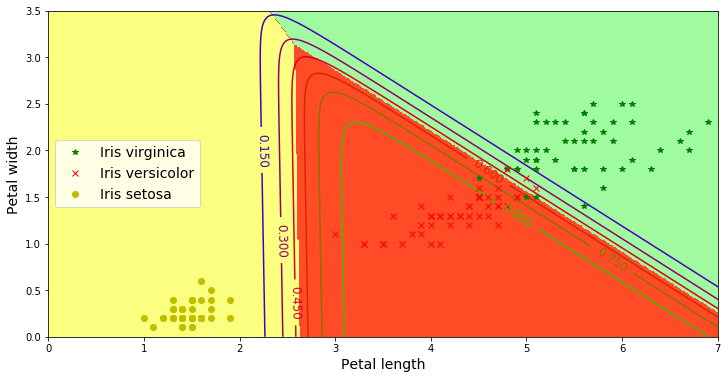

In [4]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax.predict_proba(X_new)
y_predict = softmax.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(12, 6))
plt.plot(X[y==2, 0], X[y==2, 1], "g*", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "rx", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fbff80','#ff4c26','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()



# Custom realization of softmax using homework notebook

In [5]:
def plot_surface(cls, x_1, x_2, ax=None, threshold=0.5, contourf=False):
    xx1, xx2 = np.meshgrid(np.linspace(x_1.min(), x_1.max(), 100), 
                           np.linspace(x_2.min(), x_2.max(), 100))

    X_pred = np.c_[xx1.ravel(), xx2.ravel()]
    pred = cls.predict_proba(X_pred)[:, 0]
    Z = pred.reshape((100, 100))
    if ax is None:
        ax = plt.gca()
    ax.contour(xx1, xx2, Z, levels=[threshold], colors='black')
    ax.set_xlim((x_1.min(), x_1.max()))
    ax.set_ylim((x_2.min(), x_2.max()))

In [6]:
def plot_data(A, b, test = False):
    positive_indices = np.where(b == 1)[0]
    negative_indices = np.where(b == 0)[0]
    
    plt.scatter(A[positive_indices, 0], A[positive_indices, 1], marker='x', c= 'yellow' if test else 'green')
    plt.scatter(A[negative_indices, 0], A[negative_indices, 1], marker='+', c= 'blue' if test else 'red')

In [7]:
class NeuralNet:
    """
    NN for binary classification
    Attributes:
    ...
    """
    def __init__(self, hidden_layer_sizes, normalize = True, learning_rate = 0.01, num_iter = 30000):
        self.learning_rate = learning_rate
        self.num_iter = num_iter
        self.normalize = normalize
        self.hidden_layer_sizes = hidden_layer_sizes
    
    def __normalize(self, X, mean = None, std = None):
        """
        Зверніть увагу, що нормалізація вхідних даних є дуже важливою для швидкодії нейронних мереж.
        """
        n = X.shape[0]
        if mean is None:   
            mean = np.zeros([n, 1])
        if std is None:
            std  = np.ones([n, 1])
        
        for i in range(n):
            if (np.std(X[:, i]) != 0):
                if mean is None:
                    mean[i] = np.mean(X[:, i])
                if std is None:
                    std[i] = np.std(X[:, i])
        
        X_new = (X - mean) / std
        return X_new, mean, std
    
    def __sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))
    
    def __sigmoid_derivative(self, Z):
        z = self.__sigmoid(Z)
        return np.multiply(z, (1 - z))
    #-----------------------------Initialize softmax-----------------------
    def __softmax(self, Z):
        return np.exp(Z) / np.exp(Z).sum(axis=0, keepdims=True)
    
    def __cross_entropy(self, A, Y):
        return - np.sum(Y * np.log(A), axis=1)
    
    def __initialize_parameters(self, n_x, n_y):
        self.parameters = {}
        n = len(n_x)
        
        for i in range(1, len(n_x)):
            if (i == n):
                continue
            W = np.random.randn(n_x[i], n_x[i - 1]) * 0.01
            b = np.zeros((n_x[i], 1))
            self.parameters.update({f"W{i}": W, f"b{i}": b})

        W = np.random.randn(n_y, n_x[n-1]) * 0.01
        b = np.zeros((n_y, 1))
        
        self.parameters.update({f"W{n}":W, f"b{n}":b})
                    
    def __forward_propagation(self, X):
        num_layers = len(self.hidden_layer_sizes)
        cache = self.parameters.copy() 
        A = X
        for i in range(1, num_layers + 2):
            if i == num_layers + 1:
                W = self.parameters[f"W{i}"]
                b = self.parameters[f"b{i}"]
                Z = np.dot(W, A) + b
                A = self.__softmax(Z)
            else:            
                W = self.parameters[f"W{i}"]
                b = self.parameters[f"b{i}"]
                Z = np.dot(W, A) + b
                A = self.__sigmoid(Z)
            cache.update({f"Z{i}": Z})
            cache.update({f"A{i}": A})
        return A, cache

    def compute_cost(self, A, Y):
        J = -np.mean(Y.T * np.log(A.T))
        return J
    
    def __backward_propagation(self, X, Y, cache):
        m = X.shape[1]
        n = X.shape[0]
        num_layers = len(self.hidden_layer_sizes)
        
        grads = {}
        
        for i in range(num_layers+1, 0, -1):
            W = cache[f"W{i}"]
            b = cache[f"b{i}"]
            Z = cache[f"Z{i}"]
            if i == num_layers + 1:
                A = cache[f"A{i}"]
                A_next = cache[f"A{i - 1}"]
                
                dZ = A - Y
                dW = 1. / m * np.dot(dZ, A_next.T)
                db = 1. / m * np.sum(dZ, axis = 1, keepdims = True)
            elif (i == 1):
                W_prev = cache[f"W{i + 1}"]
                A = cache[f"A{i}"]
                
                dA = np.dot(W_prev.T, dZ)
                dZ = np.multiply(dA, self.__sigmoid_derivative(A))
                dW = 1. / m * np.dot(dZ, X.T)
                db = 1. / m * np.sum(dZ, axis = 1, keepdims = True)
            else:
                W_prev = cache[f"W{i + 1}"]
                A = cache[f"A{i}"]
                A_next = cache[f"A{i - 1}"]

                dA = np.dot(W_prev.T, dZ)
                dZ = np.multiply(dA, self.__sigmoid_derivative(A))
                dW = 1. / m * np.dot(dZ, A_next.T)
                db = 1. / m * np.sum(dZ, axis = 1, keepdims = True)
            grads.update({f"dZ{i}":dZ, f"dW{i}":dW, f"db{i}":db})
        return grads
    
    def __update_parameters(self, grads):
        num_layers = len(self.hidden_layer_sizes)
        
        for i in range(1, num_layers + 2):
            W = self.parameters[f"W{i}"]
            b = self.parameters[f"b{i}"]
            
            dW = grads[f"dW{i}"]
            db = grads[f"db{i}"]
            
            self.parameters[f"W{i}"] = W - self.learning_rate * dW
            self.parameters[f"b{i}"] = b - self.learning_rate * db
            
    def fit(self, X_vert, Y_vert, print_cost = True):
        epsilon=1e-10
        X, Y = X_vert.T, Y_vert.T
        
        if self.normalize:
            X, self.__mean, self.__std = self.__normalize(X)
        
        costs = []
        
        m = X.shape[1]
        n_x = (X.shape[0],) + self.hidden_layer_sizes
        n_y = Y.shape[0]
        
        self.__initialize_parameters(n_x, n_y)
        
        
        for i in range(self.num_iter):
            A, cache = self.__forward_propagation(X)

            cost = self.compute_cost(A, Y)

            grads = self.__backward_propagation(X, Y, cache)

            self.__update_parameters(grads)

            costs.append(cost)

            if print_cost and i % 100 == 0:
                print("{}-th iteration: {}".format(i, cost))
                if i > 1:
                    print(f"Delta: {costs[-2] - costs[-1]}")
       
            if i > 1 and abs(costs[-2] - costs[-1]) < epsilon:
                break
                
        if print_cost:
            plt.plot(costs)
            plt.ylabel("Cost")
            plt.show()

    def predict_proba(self, X_vert):
        X = X_vert.T
        if self.normalize:
            X, _, _ = self.__normalize(X, self.__mean, self.__std)
        
        probs = self.__forward_propagation(X)[0]
        return probs.T
    
    def predict(self, X_vert):
        positive_probs = self.predict_proba(X_vert)
        y_pred = self.likehood_func(positive_probs)
        return y_pred  

    def likehood_func(self, z):
        return z.argmax(axis=1)


In [8]:
data_columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
target_column = "Species"
df = pd.read_csv("Iris.csv")
X, Y = df[data_columns].values, df[target_column].values.reshape((df.shape[0], 1))
print('Training set: X={}, y={}'.format(X.shape, Y.shape))

Training set: X=(150, 4), y=(150, 1)


In [9]:
from sklearn.preprocessing import OneHotEncoder

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True)

encoder = OneHotEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train).toarray()
y_labels =  [ label[3:] for label in encoder.get_feature_names()]

print(type(y_train))
print('Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

<class 'numpy.ndarray'>
Training set: X=(120, 4), y=(120, 3)
Test set: X=(30, 4), y=(30, 1)


0-th iteration: 0.36677437875403346
100-th iteration: 0.3304444835528939
Delta: 0.001272882991582125
200-th iteration: 0.20084072961104887
Delta: 0.0007227170207154687
300-th iteration: 0.160853119666266
Delta: 0.00021674769696161666
400-th iteration: 0.14664970017499107
Delta: 8.91563671137352e-05
500-th iteration: 0.14100483533484076
Delta: 2.985414920272933e-05
600-th iteration: 0.14001640511950456
Delta: -7.202845530351887e-06
700-th iteration: 0.1420388704840576
Delta: -3.0178682690118475e-05
800-th iteration: 0.14508141226492563
Delta: -2.500536088312355e-05
900-th iteration: 0.14637945998780286
Delta: -1.0090647581950662e-06
1000-th iteration: 0.14553578611439172
Delta: 1.5845288282134717e-05
1100-th iteration: 0.14354002344036756
Delta: 2.2521996274754708e-05
1200-th iteration: 0.14129209285694996
Delta: 2.1231006551991616e-05
1300-th iteration: 0.1395441763253312
Delta: 1.2504481637920506e-05
1400-th iteration: 0.1390995433919886
Delta: -5.0460352302994504e-06


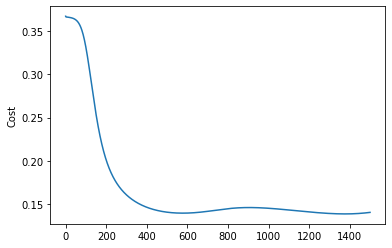

In [10]:
neuralnet = NeuralNet((50, ), normalize = True, learning_rate = 0.1, num_iter = 1500)
neuralnet.fit(X_train, y_train)

In [11]:
print(neuralnet.parameters)

{'W1': array([[-5.96424954e-02,  4.43626649e-01, -1.87977205e+00,
        -1.11057266e+00],
       [-2.59867061e-01,  1.53917915e-01, -2.24598609e+00,
        -1.42630794e+00],
       [-1.50310701e-01,  3.33522383e-01, -2.15840437e+00,
        -1.31351095e+00],
       [ 1.26904406e-02,  6.31401874e-01, -1.55978178e+00,
        -7.63650484e-01],
       [ 4.89986095e-02, -6.07173848e-03,  2.17199608e-01,
         1.20464134e-01],
       [ 1.77189071e-02,  5.99411595e-01, -1.53188176e+00,
        -7.96848078e-01],
       [-2.88966737e-01, -5.93859632e-01,  1.16515300e+00,
         6.89369505e-01],
       [-7.18644637e-02,  4.43374688e-01, -1.84094343e+00,
        -1.05989763e+00],
       [-1.00500030e-01, -2.84014430e-01,  6.84712121e-01,
         3.74153533e-01],
       [-1.80543779e-01,  2.89902017e-01, -2.24075881e+00,
        -1.38276910e+00],
       [-5.25900463e-02,  4.66878139e-01, -1.76598925e+00,
        -1.00955908e+00],
       [-1.53853365e-01,  3.44781304e-01, -2.07097426e+00,

In [12]:
Y_prob = neuralnet.predict_proba(X_test)
print(Y_prob)

[[2.22240669e-03 4.36024445e-01 5.61753149e-01]
 [8.68277721e-03 5.82336240e-01 4.08980982e-01]
 [2.23936231e-03 4.36594327e-01 5.61166310e-01]
 [5.86449952e-03 5.33970148e-01 4.60165353e-01]
 [3.73560396e-03 4.89309463e-01 5.06954934e-01]
 [3.27376047e-03 4.73012268e-01 5.23713972e-01]
 [9.30464874e-01 6.52583478e-02 4.27677779e-03]
 [9.99362806e-01 6.23230495e-04 1.39636033e-05]
 [2.27243232e-03 4.40994647e-01 5.56732921e-01]
 [9.99941451e-01 5.77677525e-05 7.81696910e-07]
 [2.35795752e-03 4.41186792e-01 5.56455250e-01]
 [2.29131442e-03 4.40105191e-01 5.57603495e-01]
 [2.26906607e-03 4.38774117e-01 5.58956817e-01]
 [2.20129107e-03 4.35681325e-01 5.62117384e-01]
 [8.08383077e-03 5.63317432e-01 4.28598737e-01]
 [3.20381469e-03 4.74387902e-01 5.22408283e-01]
 [3.30062186e-03 4.75373074e-01 5.21326304e-01]
 [9.59185000e-01 3.85352548e-02 2.27974490e-03]
 [4.60122615e-03 5.09760969e-01 4.85637805e-01]
 [2.21120320e-03 4.35777611e-01 5.62011186e-01]
 [9.99584944e-01 4.06241452e-04 8.814777

In [13]:
Y_with_hat = neuralnet.predict(X_test)
Y_hat_labels = [y_labels[i] for i in Y_with_hat]

In [14]:
accuracy_score(y_test, Y_hat_labels)

0.8